<a href="https://colab.research.google.com/github/sultanrizky10/TUGAS/blob/main/Tugas%2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import certain library to create a plot
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
NtL = lambda n: 10*np.log10(n)

In [3]:
LtN = lambda x: 10**(x/10)

In [4]:
def pathloss(fq,types,ht,hr,d):

  # If frequency is define by the range number in MHz and then the result will assigned at Ca and Cb values
  if fq in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif fq in range(1501,2001):
    Ca=46.3
    Cb=33.9
  else:
    Ca = print("The given frequency does not meet the C1 criteria.")
    Cb = print("The given frequency does not meet the C2 criteria.")
    return Ca,Cb
  
  # Based on the area type
  if types == 'urban' :
    cm=0
  elif types == 'suburban' :
    cm=-2*((np.log10((fq/28)**2))-5.4)
  elif types == 'open':
    cm=-4.78*(np.log10(fq))+18.33*(np.log10(fq))-40.94
  else:
    cm=print('The given area type(s) is not suitable for this parameter')
  
  # the value a(hr) is
  ahr = (1.1*np.log10(fq)-0.7)*hr-(1.56*np.log10(fq)-1.8)

  # Calculating the Path Loss Model
  Lp = Ca+(Cb*np.log10(fq))-(13.83*np.log10(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-cm
  return Lp

In [5]:
# The input Pathloss Model Cost 231 for Different Area and Frequency

# fq is the frequency in range of 150 to 2000 MHz
# ht is the height of antenna transmitter in range of 30 to 200 m
# hr is the height of antenna receiver in range of 1 to 20 m
# types is the type of area given
# d is the distance between the transmitter and receiver in m

fq1=700 #in Mhz
fq2=900 #in Mhz
fq3=1800 #in MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #in m
user=1.5 #in m
dmin=300 #in m
dmax=1000 #in m
N=200 #dots
d=np.random.randint(dmin,dmax,N)

# Print the randon integer of Urban area distance input
print(d) 

[816 828 327 798 405 892 926 866 620 748 360 445 594 607 436 789 789 769
 786 829 306 669 988 797 450 691 577 643 602 581 607 600 925 462 925 768
 657 490 590 854 761 928 764 778 426 403 489 922 477 640 335 798 847 966
 505 647 990 710 813 392 500 302 662 357 504 684 438 859 830 468 867 558
 601 875 344 411 579 397 692 980 645 561 968 702 463 578 412 957 704 658
 566 702 669 513 701 499 316 798 980 344 925 824 874 722 475 773 857 471
 696 557 348 741 831 929 568 867 895 465 510 585 709 563 324 313 634 310
 761 650 908 919 944 651 850 792 774 369 514 654 328 784 772 566 593 740
 325 443 382 319 716 344 585 792 459 492 762 910 556 599 370 638 731 765
 873 499 347 706 774 382 881 517 773 840 976 369 970 398 613 301 901 303
 777 604 942 934 665 431 514 810 691 392 344 988 728 596 427 898 998 515
 878 874]


In [6]:
# Define the Pathloss Cost 231 Model for Area by the given input
LpUrban=pathloss(fq3,loc1,tower,user,d)
LpSubUrban=pathloss(fq3,loc2,tower,user,d)
LpOpen=pathloss(fq3,loc3,tower,user,d)

# Sort the Distance for Area 
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

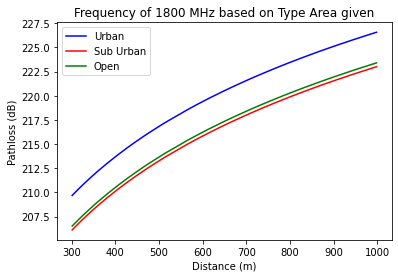

In [7]:
fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='Sub Urban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz based on Type Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [8]:
# Define the Pathloss Cost 231 Model for Frequency by the given input
LpUrbanFQ1=pathloss(fq1,loc1,tower,user,d)
LpUrbanFQ2=pathloss(fq2,loc1,tower,user,d)
LpUrbanFQ3=pathloss(fq3,loc1,tower,user,d)

# Sort the Distance for Area 
d_sort=d[np.argsort(d)]
UrbanFQ_sort=LpUrbanFQ1[np.argsort(d)]
UrbanFQ2_sort=LpUrbanFQ2[np.argsort(d)]
UrbanFQ3_sort=LpUrbanFQ3[np.argsort(d)]

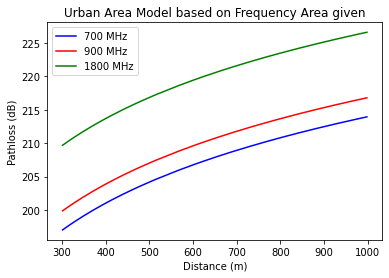

In [9]:
fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQ_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQ2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQ3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model based on Frequency Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [10]:
def ValuePrX(Ptx,Pl,Gtx,Grx):
  
  # Convert the Transmitter Power from mW to dBm
  PtdB=NtL(Ptx)
  
  # Calculating the Prx value
  PrX=PtdB - Pl + Gtx + Grx

  # Convert the Receiver Power from dBm to mW 
  PrXmW=LtN(PrX)

  return PrXmW

In [11]:
# The Input Receiver Power Model for Different Area and Frequency

# tx is the given transmitter power value
# pl is path loss value is derived from the prevoius calcultation model
# gtx is the given transmitter gain value
# grx is the given receiver gain value 

tx = 30000 # in miliwatt
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQ_sort
Ple = UrbanFQ2_sort
Plf = UrbanFQ3_sort
gtx = 10 # in dB
grx = 2 # in dB

In [12]:
# Define the Receiver Power Model for Area by the given input
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

# Define the Receiver Power Model for Frequency by the given input
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

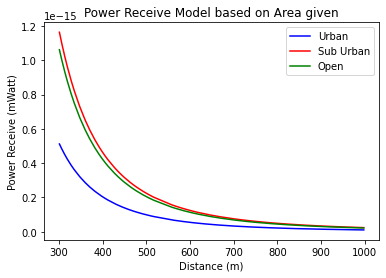

In [13]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Receive Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

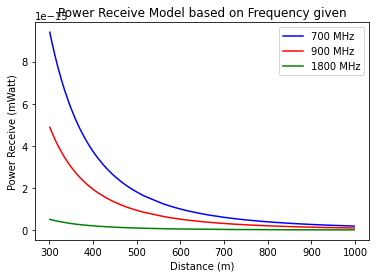

In [14]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Receive Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

In [15]:
def SNRValue(Prx,BW):

  # Calculating the No to BW
  No=-174+10*np.log10(BW)

  # Converting the No in BW to Numeric
  NoW=LtN(No)

  # Calculating the SNR Value
  SNR= Prx/NoW

  return SNR

In [16]:
# The Input SNR Model for Different Area and Frequency

# prx is receiver power value derived from the previous calculation value
# bw is the given bandwith value

Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000

In [17]:
# Define the SNR Model for Area by the given input
SNRUrban = SNRValue(Prx1,BW)
SNRSubUrban = SNRValue(Prx2,BW)
SNROpen = SNRValue(Prx3,BW)

# Define the SNR Model for Frequency by the given input
SNRUrban700 = SNRValue(Prx4,BW)
SNRUrban900 = SNRValue(Prx5,BW)
SNRUrban1800 = SNRValue(Prx6,BW)

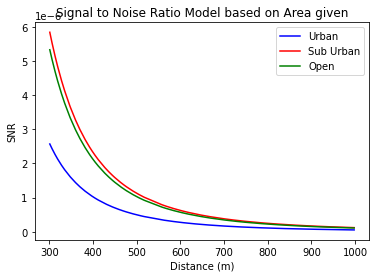

In [18]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('Signal to Noise Ratio Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

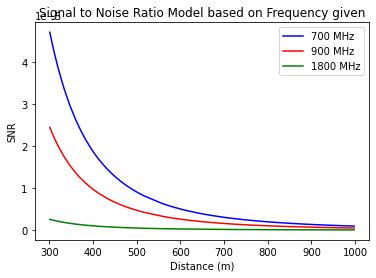

In [19]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('Signal to Noise Ratio Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

In [20]:
def Capacity(SNR,BW):

  # Calculating the Cell Capacity
  Celcap = BW*np.log2(1+SNR)

  return Celcap

In [21]:
# The Input Capacity Model for Different Area and Frequency

# SNR is a signal to noise ratio value derived from the previous calculation value
# BW is the given bandwith value

SNR1 = SNRUrban 
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [22]:
# Define the Cell Capacity Model for Area by the given input
celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)

# Define the Cell Capacity Model for Frequency by the given input
celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

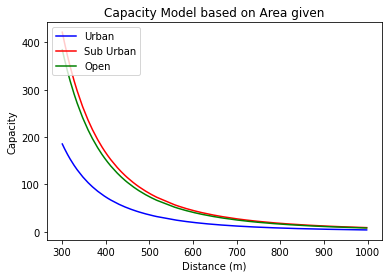

In [23]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban, color='b', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,celcapOpen, color='g', label='Open')
ax.set_title('Capacity Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()

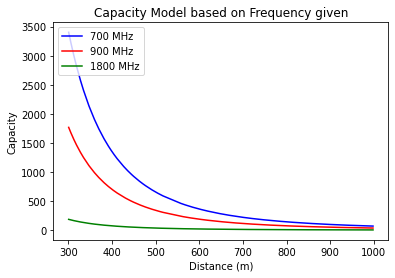

In [24]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()